In [1]:
from jupyterthemes import jtplot
from tensorflow import set_random_seed
set_random_seed(42)
jtplot.style()
# Constantes
SEED = 42
m = 64
tau = 1
delta = 1

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from keras import regularizers
from tensorflow import keras
import numpy as np
import pandas as pd

In [3]:
from Funciones import GenersConjuntos
from Funciones import plot_history

In [4]:
def ModMLP(show=True): # Modelo de la red neuronal a utilizar
    inputs = keras.Input(shape=(m))
    x = layers.Dense(64, activation='sigmoid')(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(delta, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='forecasting')
    
    if(show):
        model.summary()
    
    return model

<h3> Lectura y analisis de la serie de tiempo </h3>

Para comenzar se lee la serie de tiempo desde el archivo csv

In [5]:
TS = pd.read_csv('TimesSeries\Electric_Production.csv')

In [6]:
TS.info() # Se reviza que la serie de tiempo no tenga nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE     397 non-null object
Value    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


La serie de tiempo es tomada desde la columna value

In [7]:
serie = TS.Value
mean = serie.mean()
std = serie.std()

Se pueden revizar su media, su maximo, su minimo, y su promedio

In [8]:
print('Media:', serie.mean())
print('Maximo:', serie.max())
print('Minimo:', serie.min())
print('STD:', serie.std())

Media: 88.84721763224182
Maximo: 129.4048
Minimo: 55.3151
STD: 15.387833664730902


La serie es convertiza a numpy array para un mejor manejo, a su vez es ploteada para observar su forma

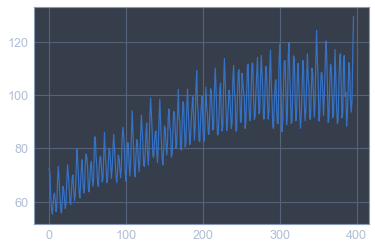

In [9]:
serie = np.array(serie)
plt.plot(serie)
plt.show()

Posteriormente se estandariza la serie y se obtienen los conjuntos de datos con los cuales se ha de entrenar la red

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test=  GenersConjuntos(serie, 0.3, 0.2)

In [11]:
X_val.shape

(47, 64)

<h3> Diseño y entrenamiento de la red neuronal </h3>

In [12]:
model = ModMLP()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 45,761
Trainable params: 45,761
Non-trainable params: 0
_________________________________________________________________


Una vez que el modelo esta creado se compila y se entrena.

En la compilación se utiliza como funcion de perdida el Error cuadratico medio en convinacion con el gradiente estocastico, el tercer parametro son las metricas en este caso se utilizan el error absoluto medio, el error cuadratico medio y accuracy, aunque la ultima no es una buena referencia cuando se realiza prediccion de series de tiempo (forcasting) es más comun su utilización en clasificación.

In [13]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=['mae', 'mse','accuracy'])

In [14]:
#callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=2000,
                    validation_data=(X_val, y_val))

test_scores = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])
print('Test mse:', test_scores[2])
print('Test acc:', test_scores[3])

Train on 186 samples, validate on 47 samples
Epoch 1/2000
186/186 [==============================] - 1s 7ms/sample - loss: 0.6492 - mean_absolute_error: 0.6344 - mean_squared_error: 0.6492 - acc: 0.0000e+00 - val_loss: 0.3781 - val_mean_absolute_error: 0.5143 - val_mean_squared_error: 0.3781 - val_acc: 0.0000e+00
Epoch 2/2000
186/186 [==============================] - 0s 359us/sample - loss: 0.4968 - mean_absolute_error: 0.5740 - mean_squared_error: 0.4968 - acc: 0.0000e+00 - val_loss: 0.3126 - val_mean_absolute_error: 0.4764 - val_mean_squared_error: 0.3126 - val_acc: 0.0000e+00
Epoch 3/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.4232 - mean_absolute_error: 0.5361 - mean_squared_error: 0.4232 - acc: 0.0000e+00 - val_loss: 0.2656 - val_mean_absolute_error: 0.4425 - val_mean_squared_error: 0.2656 - val_acc: 0.0000e+00
Epoch 4/2000
186/186 [==============================] - 0s 236us/sample - loss: 0.3716 - mean_absolute_error: 0.5040 - mean_squared_error: 0.

Epoch 31/2000
186/186 [==============================] - 0s 204us/sample - loss: 0.0797 - mean_absolute_error: 0.2266 - mean_squared_error: 0.0797 - acc: 0.0000e+00 - val_loss: 0.0389 - val_mean_absolute_error: 0.1547 - val_mean_squared_error: 0.0389 - val_acc: 0.0000e+00
Epoch 32/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0768 - mean_absolute_error: 0.2204 - mean_squared_error: 0.0768 - acc: 0.0000e+00 - val_loss: 0.0434 - val_mean_absolute_error: 0.1754 - val_mean_squared_error: 0.0434 - val_acc: 0.0000e+00
Epoch 33/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0751 - mean_absolute_error: 0.2196 - mean_squared_error: 0.0751 - acc: 0.0000e+00 - val_loss: 0.0404 - val_mean_absolute_error: 0.1663 - val_mean_squared_error: 0.0404 - val_acc: 0.0000e+00
Epoch 34/2000
186/186 [==============================] - 0s 151us/sample - loss: 0.0721 - mean_absolute_error: 0.2150 - mean_squared_error: 0.0721 - acc: 0.0000e+00 - val_loss: 0.04

186/186 [==============================] - 0s 150us/sample - loss: 0.0562 - mean_absolute_error: 0.1816 - mean_squared_error: 0.0562 - acc: 0.0000e+00 - val_loss: 0.0376 - val_mean_absolute_error: 0.1528 - val_mean_squared_error: 0.0376 - val_acc: 0.0000e+00
Epoch 62/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0513 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0513 - acc: 0.0000e+00 - val_loss: 0.0380 - val_mean_absolute_error: 0.1535 - val_mean_squared_error: 0.0380 - val_acc: 0.0000e+00
Epoch 63/2000
186/186 [==============================] - 0s 134us/sample - loss: 0.0525 - mean_absolute_error: 0.1750 - mean_squared_error: 0.0525 - acc: 0.0000e+00 - val_loss: 0.0372 - val_mean_absolute_error: 0.1522 - val_mean_squared_error: 0.0372 - val_acc: 0.0000e+00
Epoch 64/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0534 - mean_absolute_error: 0.1764 - mean_squared_error: 0.0534 - acc: 0.0000e+00 - val_loss: 0.0372 - val_mean_

186/186 [==============================] - 0s 139us/sample - loss: 0.0473 - mean_absolute_error: 0.1633 - mean_squared_error: 0.0473 - acc: 0.0000e+00 - val_loss: 0.0370 - val_mean_absolute_error: 0.1524 - val_mean_squared_error: 0.0370 - val_acc: 0.0000e+00
Epoch 92/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0473 - mean_absolute_error: 0.1640 - mean_squared_error: 0.0473 - acc: 0.0000e+00 - val_loss: 0.0362 - val_mean_absolute_error: 0.1512 - val_mean_squared_error: 0.0362 - val_acc: 0.0000e+00
Epoch 93/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0470 - mean_absolute_error: 0.1616 - mean_squared_error: 0.0470 - acc: 0.0000e+00 - val_loss: 0.0410 - val_mean_absolute_error: 0.1606 - val_mean_squared_error: 0.0410 - val_acc: 0.0000e+00
Epoch 94/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0475 - mean_absolute_error: 0.1653 - mean_squared_error: 0.0475 - acc: 0.0000e+00 - val_loss: 0.0388 - val_mean_

Epoch 121/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0445 - mean_absolute_error: 0.1568 - mean_squared_error: 0.0445 - acc: 0.0000e+00 - val_loss: 0.0354 - val_mean_absolute_error: 0.1485 - val_mean_squared_error: 0.0354 - val_acc: 0.0000e+00
Epoch 122/2000
186/186 [==============================] - 0s 134us/sample - loss: 0.0461 - mean_absolute_error: 0.1604 - mean_squared_error: 0.0461 - acc: 0.0000e+00 - val_loss: 0.0345 - val_mean_absolute_error: 0.1469 - val_mean_squared_error: 0.0345 - val_acc: 0.0000e+00
Epoch 123/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0453 - mean_absolute_error: 0.1586 - mean_squared_error: 0.0453 - acc: 0.0000e+00 - val_loss: 0.0344 - val_mean_absolute_error: 0.1467 - val_mean_squared_error: 0.0344 - val_acc: 0.0000e+00
Epoch 124/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0445 - mean_absolute_error: 0.1565 - mean_squared_error: 0.0445 - acc: 0.0000e+00 - val_loss: 

Epoch 151/2000
186/186 [==============================] - 0s 155us/sample - loss: 0.0426 - mean_absolute_error: 0.1528 - mean_squared_error: 0.0426 - acc: 0.0000e+00 - val_loss: 0.0342 - val_mean_absolute_error: 0.1455 - val_mean_squared_error: 0.0342 - val_acc: 0.0000e+00
Epoch 152/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0433 - mean_absolute_error: 0.1552 - mean_squared_error: 0.0433 - acc: 0.0000e+00 - val_loss: 0.0327 - val_mean_absolute_error: 0.1436 - val_mean_squared_error: 0.0327 - val_acc: 0.0000e+00
Epoch 153/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0434 - mean_absolute_error: 0.1552 - mean_squared_error: 0.0434 - acc: 0.0000e+00 - val_loss: 0.0330 - val_mean_absolute_error: 0.1428 - val_mean_squared_error: 0.0330 - val_acc: 0.0000e+00
Epoch 154/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0422 - mean_absolute_error: 0.1523 - mean_squared_error: 0.0422 - acc: 0.0000e+00 - val_loss: 

186/186 [==============================] - 0s 145us/sample - loss: 0.0417 - mean_absolute_error: 0.1521 - mean_squared_error: 0.0417 - acc: 0.0000e+00 - val_loss: 0.0313 - val_mean_absolute_error: 0.1399 - val_mean_squared_error: 0.0313 - val_acc: 0.0000e+00
Epoch 181/2000
186/186 [==============================] - 0s 158us/sample - loss: 0.0406 - mean_absolute_error: 0.1478 - mean_squared_error: 0.0406 - acc: 0.0000e+00 - val_loss: 0.0336 - val_mean_absolute_error: 0.1443 - val_mean_squared_error: 0.0336 - val_acc: 0.0000e+00
Epoch 182/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0405 - mean_absolute_error: 0.1493 - mean_squared_error: 0.0405 - acc: 0.0000e+00 - val_loss: 0.0317 - val_mean_absolute_error: 0.1394 - val_mean_squared_error: 0.0317 - val_acc: 0.0000e+00
Epoch 183/2000
186/186 [==============================] - 0s 129us/sample - loss: 0.0406 - mean_absolute_error: 0.1488 - mean_squared_error: 0.0406 - acc: 0.0000e+00 - val_loss: 0.0367 - val_me

Epoch 210/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0401 - mean_absolute_error: 0.1476 - mean_squared_error: 0.0401 - acc: 0.0000e+00 - val_loss: 0.0315 - val_mean_absolute_error: 0.1384 - val_mean_squared_error: 0.0315 - val_acc: 0.0000e+00
Epoch 211/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0392 - mean_absolute_error: 0.1456 - mean_squared_error: 0.0392 - acc: 0.0000e+00 - val_loss: 0.0302 - val_mean_absolute_error: 0.1365 - val_mean_squared_error: 0.0302 - val_acc: 0.0000e+00
Epoch 212/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0391 - mean_absolute_error: 0.1467 - mean_squared_error: 0.0391 - acc: 0.0000e+00 - val_loss: 0.0321 - val_mean_absolute_error: 0.1404 - val_mean_squared_error: 0.0321 - val_acc: 0.0000e+00
Epoch 213/2000
186/186 [==============================] - 0s 129us/sample - loss: 0.0393 - mean_absolute_error: 0.1464 - mean_squared_error: 0.0393 - acc: 0.0000e+00 - val_loss: 

Epoch 240/2000
186/186 [==============================] - 0s 134us/sample - loss: 0.0385 - mean_absolute_error: 0.1469 - mean_squared_error: 0.0385 - acc: 0.0000e+00 - val_loss: 0.0301 - val_mean_absolute_error: 0.1347 - val_mean_squared_error: 0.0301 - val_acc: 0.0000e+00
Epoch 241/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0379 - mean_absolute_error: 0.1434 - mean_squared_error: 0.0379 - acc: 0.0000e+00 - val_loss: 0.0296 - val_mean_absolute_error: 0.1339 - val_mean_squared_error: 0.0296 - val_acc: 0.0000e+00
Epoch 242/2000
186/186 [==============================] - 0s 129us/sample - loss: 0.0379 - mean_absolute_error: 0.1435 - mean_squared_error: 0.0379 - acc: 0.0000e+00 - val_loss: 0.0316 - val_mean_absolute_error: 0.1389 - val_mean_squared_error: 0.0316 - val_acc: 0.0000e+00
Epoch 243/2000
186/186 [==============================] - 0s 129us/sample - loss: 0.0384 - mean_absolute_error: 0.1447 - mean_squared_error: 0.0384 - acc: 0.0000e+00 - val_loss: 

Epoch 270/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0369 - mean_absolute_error: 0.1412 - mean_squared_error: 0.0369 - acc: 0.0000e+00 - val_loss: 0.0299 - val_mean_absolute_error: 0.1337 - val_mean_squared_error: 0.0299 - val_acc: 0.0000e+00
Epoch 271/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0381 - mean_absolute_error: 0.1443 - mean_squared_error: 0.0381 - acc: 0.0000e+00 - val_loss: 0.0310 - val_mean_absolute_error: 0.1370 - val_mean_squared_error: 0.0310 - val_acc: 0.0000e+00
Epoch 272/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0370 - mean_absolute_error: 0.1412 - mean_squared_error: 0.0370 - acc: 0.0000e+00 - val_loss: 0.0297 - val_mean_absolute_error: 0.1332 - val_mean_squared_error: 0.0297 - val_acc: 0.0000e+00
Epoch 273/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0377 - mean_absolute_error: 0.1420 - mean_squared_error: 0.0377 - acc: 0.0000e+00 - val_loss: 

Epoch 300/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0360 - mean_absolute_error: 0.1393 - mean_squared_error: 0.0360 - acc: 0.0000e+00 - val_loss: 0.0286 - val_mean_absolute_error: 0.1307 - val_mean_squared_error: 0.0286 - val_acc: 0.0000e+00
Epoch 301/2000
186/186 [==============================] - 0s 134us/sample - loss: 0.0361 - mean_absolute_error: 0.1393 - mean_squared_error: 0.0361 - acc: 0.0000e+00 - val_loss: 0.0282 - val_mean_absolute_error: 0.1304 - val_mean_squared_error: 0.0282 - val_acc: 0.0000e+00
Epoch 302/2000
186/186 [==============================] - 0s 123us/sample - loss: 0.0365 - mean_absolute_error: 0.1415 - mean_squared_error: 0.0365 - acc: 0.0000e+00 - val_loss: 0.0279 - val_mean_absolute_error: 0.1305 - val_mean_squared_error: 0.0279 - val_acc: 0.0000e+00
Epoch 303/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0366 - mean_absolute_error: 0.1414 - mean_squared_error: 0.0366 - acc: 0.0000e+00 - val_loss: 

Epoch 330/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0351 - mean_absolute_error: 0.1378 - mean_squared_error: 0.0351 - acc: 0.0000e+00 - val_loss: 0.0283 - val_mean_absolute_error: 0.1298 - val_mean_squared_error: 0.0283 - val_acc: 0.0000e+00
Epoch 331/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0364 - mean_absolute_error: 0.1429 - mean_squared_error: 0.0364 - acc: 0.0000e+00 - val_loss: 0.0310 - val_mean_absolute_error: 0.1361 - val_mean_squared_error: 0.0310 - val_acc: 0.0000e+00
Epoch 332/2000
186/186 [==============================] - 0s 134us/sample - loss: 0.0355 - mean_absolute_error: 0.1384 - mean_squared_error: 0.0355 - acc: 0.0000e+00 - val_loss: 0.0289 - val_mean_absolute_error: 0.1308 - val_mean_squared_error: 0.0289 - val_acc: 0.0000e+00
Epoch 333/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0359 - mean_absolute_error: 0.1392 - mean_squared_error: 0.0359 - acc: 0.0000e+00 - val_loss: 

Epoch 360/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0355 - mean_absolute_error: 0.1380 - mean_squared_error: 0.0355 - acc: 0.0000e+00 - val_loss: 0.0306 - val_mean_absolute_error: 0.1343 - val_mean_squared_error: 0.0306 - val_acc: 0.0000e+00
Epoch 361/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0348 - mean_absolute_error: 0.1372 - mean_squared_error: 0.0348 - acc: 0.0000e+00 - val_loss: 0.0296 - val_mean_absolute_error: 0.1318 - val_mean_squared_error: 0.0296 - val_acc: 0.0000e+00
Epoch 362/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0363 - mean_absolute_error: 0.1411 - mean_squared_error: 0.0363 - acc: 0.0000e+00 - val_loss: 0.0287 - val_mean_absolute_error: 0.1302 - val_mean_squared_error: 0.0287 - val_acc: 0.0000e+00
Epoch 363/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0344 - mean_absolute_error: 0.1362 - mean_squared_error: 0.0344 - acc: 0.0000e+00 - val_loss: 

Epoch 390/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0337 - mean_absolute_error: 0.1352 - mean_squared_error: 0.0337 - acc: 0.0000e+00 - val_loss: 0.0282 - val_mean_absolute_error: 0.1290 - val_mean_squared_error: 0.0282 - val_acc: 0.0000e+00
Epoch 391/2000
186/186 [==============================] - 0s 134us/sample - loss: 0.0337 - mean_absolute_error: 0.1349 - mean_squared_error: 0.0337 - acc: 0.0000e+00 - val_loss: 0.0279 - val_mean_absolute_error: 0.1283 - val_mean_squared_error: 0.0279 - val_acc: 0.0000e+00
Epoch 392/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0342 - mean_absolute_error: 0.1357 - mean_squared_error: 0.0342 - acc: 0.0000e+00 - val_loss: 0.0267 - val_mean_absolute_error: 0.1259 - val_mean_squared_error: 0.0267 - val_acc: 0.0000e+00
Epoch 393/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0335 - mean_absolute_error: 0.1361 - mean_squared_error: 0.0335 - acc: 0.0000e+00 - val_loss: 

Epoch 420/2000
186/186 [==============================] - 0s 153us/sample - loss: 0.0330 - mean_absolute_error: 0.1335 - mean_squared_error: 0.0330 - acc: 0.0000e+00 - val_loss: 0.0266 - val_mean_absolute_error: 0.1255 - val_mean_squared_error: 0.0266 - val_acc: 0.0000e+00
Epoch 421/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0333 - mean_absolute_error: 0.1348 - mean_squared_error: 0.0333 - acc: 0.0000e+00 - val_loss: 0.0269 - val_mean_absolute_error: 0.1262 - val_mean_squared_error: 0.0269 - val_acc: 0.0000e+00
Epoch 422/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0336 - mean_absolute_error: 0.1357 - mean_squared_error: 0.0336 - acc: 0.0000e+00 - val_loss: 0.0263 - val_mean_absolute_error: 0.1243 - val_mean_squared_error: 0.0263 - val_acc: 0.0000e+00
Epoch 423/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0342 - mean_absolute_error: 0.1386 - mean_squared_error: 0.0342 - acc: 0.0000e+00 - val_loss: 

Epoch 450/2000
186/186 [==============================] - 0s 134us/sample - loss: 0.0328 - mean_absolute_error: 0.1328 - mean_squared_error: 0.0328 - acc: 0.0000e+00 - val_loss: 0.0269 - val_mean_absolute_error: 0.1259 - val_mean_squared_error: 0.0269 - val_acc: 0.0000e+00
Epoch 451/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0326 - mean_absolute_error: 0.1325 - mean_squared_error: 0.0326 - acc: 0.0000e+00 - val_loss: 0.0260 - val_mean_absolute_error: 0.1237 - val_mean_squared_error: 0.0260 - val_acc: 0.0000e+00
Epoch 452/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0342 - mean_absolute_error: 0.1371 - mean_squared_error: 0.0342 - acc: 0.0000e+00 - val_loss: 0.0289 - val_mean_absolute_error: 0.1310 - val_mean_squared_error: 0.0289 - val_acc: 0.0000e+00
Epoch 453/2000
186/186 [==============================] - 0s 134us/sample - loss: 0.0335 - mean_absolute_error: 0.1360 - mean_squared_error: 0.0335 - acc: 0.0000e+00 - val_loss: 

Epoch 480/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0334 - mean_absolute_error: 0.1368 - mean_squared_error: 0.0334 - acc: 0.0000e+00 - val_loss: 0.0257 - val_mean_absolute_error: 0.1233 - val_mean_squared_error: 0.0257 - val_acc: 0.0000e+00
Epoch 481/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0325 - mean_absolute_error: 0.1339 - mean_squared_error: 0.0325 - acc: 0.0000e+00 - val_loss: 0.0258 - val_mean_absolute_error: 0.1236 - val_mean_squared_error: 0.0258 - val_acc: 0.0000e+00
Epoch 482/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0318 - mean_absolute_error: 0.1315 - mean_squared_error: 0.0318 - acc: 0.0000e+00 - val_loss: 0.0282 - val_mean_absolute_error: 0.1296 - val_mean_squared_error: 0.0282 - val_acc: 0.0000e+00
Epoch 483/2000
186/186 [==============================] - 0s 155us/sample - loss: 0.0324 - mean_absolute_error: 0.1339 - mean_squared_error: 0.0324 - acc: 0.0000e+00 - val_loss: 

Epoch 510/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0320 - mean_absolute_error: 0.1329 - mean_squared_error: 0.0320 - acc: 0.0000e+00 - val_loss: 0.0278 - val_mean_absolute_error: 0.1288 - val_mean_squared_error: 0.0278 - val_acc: 0.0000e+00
Epoch 511/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0336 - mean_absolute_error: 0.1373 - mean_squared_error: 0.0336 - acc: 0.0000e+00 - val_loss: 0.0332 - val_mean_absolute_error: 0.1405 - val_mean_squared_error: 0.0332 - val_acc: 0.0000e+00
Epoch 512/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0319 - mean_absolute_error: 0.1310 - mean_squared_error: 0.0319 - acc: 0.0000e+00 - val_loss: 0.0261 - val_mean_absolute_error: 0.1248 - val_mean_squared_error: 0.0261 - val_acc: 0.0000e+00
Epoch 513/2000
186/186 [==============================] - 0s 129us/sample - loss: 0.0316 - mean_absolute_error: 0.1321 - mean_squared_error: 0.0316 - acc: 0.0000e+00 - val_loss: 

Epoch 540/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0319 - mean_absolute_error: 0.1324 - mean_squared_error: 0.0319 - acc: 0.0000e+00 - val_loss: 0.0250 - val_mean_absolute_error: 0.1212 - val_mean_squared_error: 0.0250 - val_acc: 0.0000e+00
Epoch 541/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0309 - mean_absolute_error: 0.1303 - mean_squared_error: 0.0309 - acc: 0.0000e+00 - val_loss: 0.0255 - val_mean_absolute_error: 0.1231 - val_mean_squared_error: 0.0255 - val_acc: 0.0000e+00
Epoch 542/2000
186/186 [==============================] - 0s 193us/sample - loss: 0.0316 - mean_absolute_error: 0.1327 - mean_squared_error: 0.0316 - acc: 0.0000e+00 - val_loss: 0.0283 - val_mean_absolute_error: 0.1295 - val_mean_squared_error: 0.0283 - val_acc: 0.0000e+00
Epoch 543/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0308 - mean_absolute_error: 0.1284 - mean_squared_error: 0.0308 - acc: 0.0000e+00 - val_loss: 

186/186 [==============================] - 0s 145us/sample - loss: 0.0306 - mean_absolute_error: 0.1289 - mean_squared_error: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0274 - val_mean_absolute_error: 0.1276 - val_mean_squared_error: 0.0274 - val_acc: 0.0000e+00
Epoch 570/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0306 - mean_absolute_error: 0.1302 - mean_squared_error: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0273 - val_mean_absolute_error: 0.1274 - val_mean_squared_error: 0.0273 - val_acc: 0.0000e+00
Epoch 571/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0310 - mean_absolute_error: 0.1302 - mean_squared_error: 0.0310 - acc: 0.0000e+00 - val_loss: 0.0267 - val_mean_absolute_error: 0.1261 - val_mean_squared_error: 0.0267 - val_acc: 0.0000e+00
Epoch 572/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0311 - mean_absolute_error: 0.1298 - mean_squared_error: 0.0311 - acc: 0.0000e+00 - val_loss: 0.0254 - val_me

Epoch 599/2000
186/186 [==============================] - 0s 158us/sample - loss: 0.0300 - mean_absolute_error: 0.1273 - mean_squared_error: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0255 - val_mean_absolute_error: 0.1228 - val_mean_squared_error: 0.0255 - val_acc: 0.0000e+00
Epoch 600/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0306 - mean_absolute_error: 0.1282 - mean_squared_error: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0245 - val_mean_absolute_error: 0.1191 - val_mean_squared_error: 0.0245 - val_acc: 0.0000e+00
Epoch 601/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0324 - mean_absolute_error: 0.1345 - mean_squared_error: 0.0324 - acc: 0.0000e+00 - val_loss: 0.0249 - val_mean_absolute_error: 0.1213 - val_mean_squared_error: 0.0249 - val_acc: 0.0000e+00
Epoch 602/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0302 - mean_absolute_error: 0.1292 - mean_squared_error: 0.0302 - acc: 0.0000e+00 - val_loss: 

Epoch 629/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0296 - mean_absolute_error: 0.1274 - mean_squared_error: 0.0296 - acc: 0.0000e+00 - val_loss: 0.0252 - val_mean_absolute_error: 0.1227 - val_mean_squared_error: 0.0252 - val_acc: 0.0000e+00
Epoch 630/2000
186/186 [==============================] - 0s 155us/sample - loss: 0.0294 - mean_absolute_error: 0.1270 - mean_squared_error: 0.0294 - acc: 0.0000e+00 - val_loss: 0.0259 - val_mean_absolute_error: 0.1243 - val_mean_squared_error: 0.0259 - val_acc: 0.0000e+00
Epoch 631/2000
186/186 [==============================] - 0s 155us/sample - loss: 0.0294 - mean_absolute_error: 0.1264 - mean_squared_error: 0.0294 - acc: 0.0000e+00 - val_loss: 0.0249 - val_mean_absolute_error: 0.1215 - val_mean_squared_error: 0.0249 - val_acc: 0.0000e+00
Epoch 632/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0297 - mean_absolute_error: 0.1278 - mean_squared_error: 0.0297 - acc: 0.0000e+00 - val_loss: 

186/186 [==============================] - 0s 145us/sample - loss: 0.0300 - mean_absolute_error: 0.1298 - mean_squared_error: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0295 - val_mean_absolute_error: 0.1322 - val_mean_squared_error: 0.0295 - val_acc: 0.0000e+00
Epoch 659/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0292 - mean_absolute_error: 0.1267 - mean_squared_error: 0.0292 - acc: 0.0000e+00 - val_loss: 0.0250 - val_mean_absolute_error: 0.1223 - val_mean_squared_error: 0.0250 - val_acc: 0.0000e+00
Epoch 660/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0292 - mean_absolute_error: 0.1266 - mean_squared_error: 0.0292 - acc: 0.0000e+00 - val_loss: 0.0262 - val_mean_absolute_error: 0.1249 - val_mean_squared_error: 0.0262 - val_acc: 0.0000e+00
Epoch 661/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0289 - mean_absolute_error: 0.1252 - mean_squared_error: 0.0289 - acc: 0.0000e+00 - val_loss: 0.0245 - val_me

Epoch 688/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0289 - mean_absolute_error: 0.1259 - mean_squared_error: 0.0289 - acc: 0.0000e+00 - val_loss: 0.0263 - val_mean_absolute_error: 0.1251 - val_mean_squared_error: 0.0263 - val_acc: 0.0000e+00
Epoch 689/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0302 - mean_absolute_error: 0.1308 - mean_squared_error: 0.0302 - acc: 0.0000e+00 - val_loss: 0.0288 - val_mean_absolute_error: 0.1305 - val_mean_squared_error: 0.0288 - val_acc: 0.0000e+00
Epoch 690/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0288 - mean_absolute_error: 0.1245 - mean_squared_error: 0.0288 - acc: 0.0000e+00 - val_loss: 0.0242 - val_mean_absolute_error: 0.1195 - val_mean_squared_error: 0.0242 - val_acc: 0.0000e+00
Epoch 691/2000
186/186 [==============================] - 0s 214us/sample - loss: 0.0288 - mean_absolute_error: 0.1262 - mean_squared_error: 0.0288 - acc: 0.0000e+00 - val_loss: 

Epoch 718/2000
186/186 [==============================] - 0s 343us/sample - loss: 0.0286 - mean_absolute_error: 0.1249 - mean_squared_error: 0.0286 - acc: 0.0000e+00 - val_loss: 0.0278 - val_mean_absolute_error: 0.1280 - val_mean_squared_error: 0.0278 - val_acc: 0.0000e+00
Epoch 719/2000
186/186 [==============================] - 0s 322us/sample - loss: 0.0287 - mean_absolute_error: 0.1266 - mean_squared_error: 0.0287 - acc: 0.0000e+00 - val_loss: 0.0250 - val_mean_absolute_error: 0.1225 - val_mean_squared_error: 0.0250 - val_acc: 0.0000e+00
Epoch 720/2000
186/186 [==============================] - 0s 311us/sample - loss: 0.0287 - mean_absolute_error: 0.1260 - mean_squared_error: 0.0287 - acc: 0.0000e+00 - val_loss: 0.0256 - val_mean_absolute_error: 0.1240 - val_mean_squared_error: 0.0256 - val_acc: 0.0000e+00
Epoch 721/2000
186/186 [==============================] - 0s 247us/sample - loss: 0.0286 - mean_absolute_error: 0.1255 - mean_squared_error: 0.0286 - acc: 0.0000e+00 - val_loss: 

Epoch 748/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0284 - mean_absolute_error: 0.1258 - mean_squared_error: 0.0284 - acc: 0.0000e+00 - val_loss: 0.0288 - val_mean_absolute_error: 0.1303 - val_mean_squared_error: 0.0288 - val_acc: 0.0000e+00
Epoch 749/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0283 - mean_absolute_error: 0.1250 - mean_squared_error: 0.0283 - acc: 0.0000e+00 - val_loss: 0.0241 - val_mean_absolute_error: 0.1203 - val_mean_squared_error: 0.0241 - val_acc: 0.0000e+00
Epoch 750/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0283 - mean_absolute_error: 0.1255 - mean_squared_error: 0.0283 - acc: 0.0000e+00 - val_loss: 0.0282 - val_mean_absolute_error: 0.1290 - val_mean_squared_error: 0.0282 - val_acc: 0.0000e+00
Epoch 751/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0279 - mean_absolute_error: 0.1250 - mean_squared_error: 0.0279 - acc: 0.0000e+00 - val_loss: 

Epoch 778/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0280 - mean_absolute_error: 0.1255 - mean_squared_error: 0.0280 - acc: 0.0000e+00 - val_loss: 0.0266 - val_mean_absolute_error: 0.1259 - val_mean_squared_error: 0.0266 - val_acc: 0.0000e+00
Epoch 779/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0280 - mean_absolute_error: 0.1242 - mean_squared_error: 0.0280 - acc: 0.0000e+00 - val_loss: 0.0233 - val_mean_absolute_error: 0.1183 - val_mean_squared_error: 0.0233 - val_acc: 0.0000e+00
Epoch 780/2000
186/186 [==============================] - 0s 198us/sample - loss: 0.0281 - mean_absolute_error: 0.1261 - mean_squared_error: 0.0281 - acc: 0.0000e+00 - val_loss: 0.0234 - val_mean_absolute_error: 0.1181 - val_mean_squared_error: 0.0234 - val_acc: 0.0000e+00
Epoch 781/2000
186/186 [==============================] - 0s 236us/sample - loss: 0.0278 - mean_absolute_error: 0.1250 - mean_squared_error: 0.0278 - acc: 0.0000e+00 - val_loss: 

Epoch 808/2000
186/186 [==============================] - 0s 155us/sample - loss: 0.0274 - mean_absolute_error: 0.1230 - mean_squared_error: 0.0274 - acc: 0.0000e+00 - val_loss: 0.0237 - val_mean_absolute_error: 0.1196 - val_mean_squared_error: 0.0237 - val_acc: 0.0000e+00
Epoch 809/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0274 - mean_absolute_error: 0.1236 - mean_squared_error: 0.0274 - acc: 0.0000e+00 - val_loss: 0.0233 - val_mean_absolute_error: 0.1182 - val_mean_squared_error: 0.0233 - val_acc: 0.0000e+00
Epoch 810/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0279 - mean_absolute_error: 0.1244 - mean_squared_error: 0.0279 - acc: 0.0000e+00 - val_loss: 0.0278 - val_mean_absolute_error: 0.1282 - val_mean_squared_error: 0.0278 - val_acc: 0.0000e+00
Epoch 811/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0277 - mean_absolute_error: 0.1253 - mean_squared_error: 0.0277 - acc: 0.0000e+00 - val_loss: 

Epoch 838/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0291 - mean_absolute_error: 0.1271 - mean_squared_error: 0.0291 - acc: 0.0000e+00 - val_loss: 0.0234 - val_mean_absolute_error: 0.1173 - val_mean_squared_error: 0.0234 - val_acc: 0.0000e+00
Epoch 839/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0287 - mean_absolute_error: 0.1262 - mean_squared_error: 0.0287 - acc: 0.0000e+00 - val_loss: 0.0262 - val_mean_absolute_error: 0.1249 - val_mean_squared_error: 0.0262 - val_acc: 0.0000e+00
Epoch 840/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0273 - mean_absolute_error: 0.1224 - mean_squared_error: 0.0273 - acc: 0.0000e+00 - val_loss: 0.0255 - val_mean_absolute_error: 0.1235 - val_mean_squared_error: 0.0255 - val_acc: 0.0000e+00
Epoch 841/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0270 - mean_absolute_error: 0.1220 - mean_squared_error: 0.0270 - acc: 0.0000e+00 - val_loss: 

186/186 [==============================] - 0s 161us/sample - loss: 0.0270 - mean_absolute_error: 0.1226 - mean_squared_error: 0.0270 - acc: 0.0000e+00 - val_loss: 0.0242 - val_mean_absolute_error: 0.1214 - val_mean_squared_error: 0.0242 - val_acc: 0.0000e+00
Epoch 868/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0282 - mean_absolute_error: 0.1253 - mean_squared_error: 0.0282 - acc: 0.0000e+00 - val_loss: 0.0231 - val_mean_absolute_error: 0.1175 - val_mean_squared_error: 0.0231 - val_acc: 0.0000e+00
Epoch 869/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0267 - mean_absolute_error: 0.1218 - mean_squared_error: 0.0267 - acc: 0.0000e+00 - val_loss: 0.0243 - val_mean_absolute_error: 0.1217 - val_mean_squared_error: 0.0243 - val_acc: 0.0000e+00
Epoch 870/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0264 - mean_absolute_error: 0.1203 - mean_squared_error: 0.0264 - acc: 0.0000e+00 - val_loss: 0.0232 - val_me

Epoch 897/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0266 - mean_absolute_error: 0.1221 - mean_squared_error: 0.0266 - acc: 0.0000e+00 - val_loss: 0.0243 - val_mean_absolute_error: 0.1218 - val_mean_squared_error: 0.0243 - val_acc: 0.0000e+00
Epoch 898/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0269 - mean_absolute_error: 0.1241 - mean_squared_error: 0.0269 - acc: 0.0000e+00 - val_loss: 0.0242 - val_mean_absolute_error: 0.1215 - val_mean_squared_error: 0.0242 - val_acc: 0.0000e+00
Epoch 899/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0286 - mean_absolute_error: 0.1263 - mean_squared_error: 0.0286 - acc: 0.0000e+00 - val_loss: 0.0249 - val_mean_absolute_error: 0.1218 - val_mean_squared_error: 0.0249 - val_acc: 0.0000e+00
Epoch 900/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0268 - mean_absolute_error: 0.1220 - mean_squared_error: 0.0268 - acc: 0.0000e+00 - val_loss: 

Epoch 927/2000
186/186 [==============================] - 0s 174us/sample - loss: 0.0286 - mean_absolute_error: 0.1242 - mean_squared_error: 0.0286 - acc: 0.0000e+00 - val_loss: 0.0246 - val_mean_absolute_error: 0.1223 - val_mean_squared_error: 0.0246 - val_acc: 0.0000e+00
Epoch 928/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0258 - mean_absolute_error: 0.1199 - mean_squared_error: 0.0258 - acc: 0.0000e+00 - val_loss: 0.0237 - val_mean_absolute_error: 0.1206 - val_mean_squared_error: 0.0237 - val_acc: 0.0000e+00
Epoch 929/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0278 - mean_absolute_error: 0.1252 - mean_squared_error: 0.0278 - acc: 0.0000e+00 - val_loss: 0.0229 - val_mean_absolute_error: 0.1184 - val_mean_squared_error: 0.0229 - val_acc: 0.0000e+00
Epoch 930/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0264 - mean_absolute_error: 0.1211 - mean_squared_error: 0.0264 - acc: 0.0000e+00 - val_loss: 

Epoch 957/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0256 - mean_absolute_error: 0.1192 - mean_squared_error: 0.0256 - acc: 0.0000e+00 - val_loss: 0.0234 - val_mean_absolute_error: 0.1197 - val_mean_squared_error: 0.0234 - val_acc: 0.0000e+00
Epoch 958/2000
186/186 [==============================] - 0s 204us/sample - loss: 0.0255 - mean_absolute_error: 0.1195 - mean_squared_error: 0.0255 - acc: 0.0000e+00 - val_loss: 0.0237 - val_mean_absolute_error: 0.1205 - val_mean_squared_error: 0.0237 - val_acc: 0.0000e+00
Epoch 959/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0261 - mean_absolute_error: 0.1207 - mean_squared_error: 0.0261 - acc: 0.0000e+00 - val_loss: 0.0241 - val_mean_absolute_error: 0.1214 - val_mean_squared_error: 0.0241 - val_acc: 0.0000e+00
Epoch 960/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0260 - mean_absolute_error: 0.1203 - mean_squared_error: 0.0260 - acc: 0.0000e+00 - val_loss: 

Epoch 987/2000
186/186 [==============================] - 0s 268us/sample - loss: 0.0253 - mean_absolute_error: 0.1195 - mean_squared_error: 0.0253 - acc: 0.0000e+00 - val_loss: 0.0236 - val_mean_absolute_error: 0.1201 - val_mean_squared_error: 0.0236 - val_acc: 0.0000e+00
Epoch 988/2000
186/186 [==============================] - 0s 209us/sample - loss: 0.0267 - mean_absolute_error: 0.1236 - mean_squared_error: 0.0267 - acc: 0.0000e+00 - val_loss: 0.0258 - val_mean_absolute_error: 0.1238 - val_mean_squared_error: 0.0258 - val_acc: 0.0000e+00
Epoch 989/2000
186/186 [==============================] - 0s 193us/sample - loss: 0.0260 - mean_absolute_error: 0.1215 - mean_squared_error: 0.0260 - acc: 0.0000e+00 - val_loss: 0.0228 - val_mean_absolute_error: 0.1185 - val_mean_squared_error: 0.0228 - val_acc: 0.0000e+00
Epoch 990/2000
186/186 [==============================] - 0s 279us/sample - loss: 0.0252 - mean_absolute_error: 0.1190 - mean_squared_error: 0.0252 - acc: 0.0000e+00 - val_loss: 

Epoch 1017/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0250 - mean_absolute_error: 0.1186 - mean_squared_error: 0.0250 - acc: 0.0000e+00 - val_loss: 0.0236 - val_mean_absolute_error: 0.1200 - val_mean_squared_error: 0.0236 - val_acc: 0.0000e+00
Epoch 1018/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0250 - mean_absolute_error: 0.1185 - mean_squared_error: 0.0250 - acc: 0.0000e+00 - val_loss: 0.0240 - val_mean_absolute_error: 0.1206 - val_mean_squared_error: 0.0240 - val_acc: 0.0000e+00
Epoch 1019/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0250 - mean_absolute_error: 0.1189 - mean_squared_error: 0.0250 - acc: 0.0000e+00 - val_loss: 0.0256 - val_mean_absolute_error: 0.1233 - val_mean_squared_error: 0.0256 - val_acc: 0.0000e+00
Epoch 1020/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0249 - mean_absolute_error: 0.1178 - mean_squared_error: 0.0249 - acc: 0.0000e+00 - val_lo

Epoch 1047/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0247 - mean_absolute_error: 0.1176 - mean_squared_error: 0.0247 - acc: 0.0000e+00 - val_loss: 0.0230 - val_mean_absolute_error: 0.1191 - val_mean_squared_error: 0.0230 - val_acc: 0.0000e+00
Epoch 1048/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0246 - mean_absolute_error: 0.1177 - mean_squared_error: 0.0246 - acc: 0.0000e+00 - val_loss: 0.0236 - val_mean_absolute_error: 0.1203 - val_mean_squared_error: 0.0236 - val_acc: 0.0000e+00
Epoch 1049/2000
186/186 [==============================] - 0s 198us/sample - loss: 0.0267 - mean_absolute_error: 0.1235 - mean_squared_error: 0.0267 - acc: 0.0000e+00 - val_loss: 0.0228 - val_mean_absolute_error: 0.1191 - val_mean_squared_error: 0.0228 - val_acc: 0.0000e+00
Epoch 1050/2000
186/186 [==============================] - 0s 193us/sample - loss: 0.0246 - mean_absolute_error: 0.1180 - mean_squared_error: 0.0246 - acc: 0.0000e+00 - val_lo

Epoch 1077/2000
186/186 [==============================] - 0s 193us/sample - loss: 0.0247 - mean_absolute_error: 0.1186 - mean_squared_error: 0.0247 - acc: 0.0000e+00 - val_loss: 0.0229 - val_mean_absolute_error: 0.1190 - val_mean_squared_error: 0.0229 - val_acc: 0.0000e+00
Epoch 1078/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0246 - mean_absolute_error: 0.1169 - mean_squared_error: 0.0246 - acc: 0.0000e+00 - val_loss: 0.0226 - val_mean_absolute_error: 0.1174 - val_mean_squared_error: 0.0226 - val_acc: 0.0000e+00
Epoch 1079/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0247 - mean_absolute_error: 0.1193 - mean_squared_error: 0.0247 - acc: 0.0000e+00 - val_loss: 0.0227 - val_mean_absolute_error: 0.1182 - val_mean_squared_error: 0.0227 - val_acc: 0.0000e+00
Epoch 1080/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0244 - mean_absolute_error: 0.1180 - mean_squared_error: 0.0244 - acc: 0.0000e+00 - val_lo

Epoch 1107/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0240 - mean_absolute_error: 0.1163 - mean_squared_error: 0.0240 - acc: 0.0000e+00 - val_loss: 0.0242 - val_mean_absolute_error: 0.1214 - val_mean_squared_error: 0.0242 - val_acc: 0.0000e+00
Epoch 1108/2000
186/186 [==============================] - 0s 142us/sample - loss: 0.0245 - mean_absolute_error: 0.1172 - mean_squared_error: 0.0245 - acc: 0.0000e+00 - val_loss: 0.0258 - val_mean_absolute_error: 0.1238 - val_mean_squared_error: 0.0258 - val_acc: 0.0000e+00
Epoch 1109/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0241 - mean_absolute_error: 0.1166 - mean_squared_error: 0.0241 - acc: 0.0000e+00 - val_loss: 0.0236 - val_mean_absolute_error: 0.1205 - val_mean_squared_error: 0.0236 - val_acc: 0.0000e+00
Epoch 1110/2000
186/186 [==============================] - 0s 158us/sample - loss: 0.0273 - mean_absolute_error: 0.1245 - mean_squared_error: 0.0273 - acc: 0.0000e+00 - val_lo

Epoch 1137/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0239 - mean_absolute_error: 0.1164 - mean_squared_error: 0.0239 - acc: 0.0000e+00 - val_loss: 0.0251 - val_mean_absolute_error: 0.1232 - val_mean_squared_error: 0.0251 - val_acc: 0.0000e+00
Epoch 1138/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0239 - mean_absolute_error: 0.1160 - mean_squared_error: 0.0239 - acc: 0.0000e+00 - val_loss: 0.0236 - val_mean_absolute_error: 0.1204 - val_mean_squared_error: 0.0236 - val_acc: 0.0000e+00
Epoch 1139/2000
186/186 [==============================] - 0s 155us/sample - loss: 0.0237 - mean_absolute_error: 0.1157 - mean_squared_error: 0.0237 - acc: 0.0000e+00 - val_loss: 0.0226 - val_mean_absolute_error: 0.1182 - val_mean_squared_error: 0.0226 - val_acc: 0.0000e+00
Epoch 1140/2000
186/186 [==============================] - 0s 220us/sample - loss: 0.0239 - mean_absolute_error: 0.1164 - mean_squared_error: 0.0239 - acc: 0.0000e+00 - val_lo

Epoch 1167/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0241 - mean_absolute_error: 0.1154 - mean_squared_error: 0.0241 - acc: 0.0000e+00 - val_loss: 0.0237 - val_mean_absolute_error: 0.1208 - val_mean_squared_error: 0.0237 - val_acc: 0.0000e+00
Epoch 1168/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0243 - mean_absolute_error: 0.1194 - mean_squared_error: 0.0243 - acc: 0.0000e+00 - val_loss: 0.0224 - val_mean_absolute_error: 0.1177 - val_mean_squared_error: 0.0224 - val_acc: 0.0000e+00
Epoch 1169/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0244 - mean_absolute_error: 0.1179 - mean_squared_error: 0.0244 - acc: 0.0000e+00 - val_loss: 0.0222 - val_mean_absolute_error: 0.1174 - val_mean_squared_error: 0.0222 - val_acc: 0.0000e+00
Epoch 1170/2000
186/186 [==============================] - 0s 169us/sample - loss: 0.0241 - mean_absolute_error: 0.1168 - mean_squared_error: 0.0241 - acc: 0.0000e+00 - val_lo

Epoch 1197/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0239 - mean_absolute_error: 0.1169 - mean_squared_error: 0.0239 - acc: 0.0000e+00 - val_loss: 0.0231 - val_mean_absolute_error: 0.1202 - val_mean_squared_error: 0.0231 - val_acc: 0.0000e+00
Epoch 1198/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0239 - mean_absolute_error: 0.1191 - mean_squared_error: 0.0239 - acc: 0.0000e+00 - val_loss: 0.0222 - val_mean_absolute_error: 0.1170 - val_mean_squared_error: 0.0222 - val_acc: 0.0000e+00
Epoch 1199/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0244 - mean_absolute_error: 0.1174 - mean_squared_error: 0.0244 - acc: 0.0000e+00 - val_loss: 0.0234 - val_mean_absolute_error: 0.1209 - val_mean_squared_error: 0.0234 - val_acc: 0.0000e+00
Epoch 1200/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0243 - mean_absolute_error: 0.1179 - mean_squared_error: 0.0243 - acc: 0.0000e+00 - val_lo

186/186 [==============================] - 0s 199us/sample - loss: 0.0239 - mean_absolute_error: 0.1189 - mean_squared_error: 0.0239 - acc: 0.0000e+00 - val_loss: 0.0221 - val_mean_absolute_error: 0.1167 - val_mean_squared_error: 0.0221 - val_acc: 0.0000e+00
Epoch 1227/2000
186/186 [==============================] - 0s 268us/sample - loss: 0.0242 - mean_absolute_error: 0.1181 - mean_squared_error: 0.0242 - acc: 0.0000e+00 - val_loss: 0.0254 - val_mean_absolute_error: 0.1231 - val_mean_squared_error: 0.0254 - val_acc: 0.0000e+00
Epoch 1228/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0241 - mean_absolute_error: 0.1168 - mean_squared_error: 0.0241 - acc: 0.0000e+00 - val_loss: 0.0227 - val_mean_absolute_error: 0.1188 - val_mean_squared_error: 0.0227 - val_acc: 0.0000e+00
Epoch 1229/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0230 - mean_absolute_error: 0.1145 - mean_squared_error: 0.0230 - acc: 0.0000e+00 - val_loss: 0.0226 - val

Epoch 1256/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0231 - mean_absolute_error: 0.1145 - mean_squared_error: 0.0231 - acc: 0.0000e+00 - val_loss: 0.0226 - val_mean_absolute_error: 0.1183 - val_mean_squared_error: 0.0226 - val_acc: 0.0000e+00
Epoch 1257/2000
186/186 [==============================] - 0s 151us/sample - loss: 0.0227 - mean_absolute_error: 0.1138 - mean_squared_error: 0.0227 - acc: 0.0000e+00 - val_loss: 0.0244 - val_mean_absolute_error: 0.1214 - val_mean_squared_error: 0.0244 - val_acc: 0.0000e+00
Epoch 1258/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0231 - mean_absolute_error: 0.1136 - mean_squared_error: 0.0231 - acc: 0.0000e+00 - val_loss: 0.0252 - val_mean_absolute_error: 0.1229 - val_mean_squared_error: 0.0252 - val_acc: 0.0000e+00
Epoch 1259/2000
186/186 [==============================] - 0s 193us/sample - loss: 0.0236 - mean_absolute_error: 0.1147 - mean_squared_error: 0.0236 - acc: 0.0000e+00 - val_lo

Epoch 1286/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0235 - mean_absolute_error: 0.1161 - mean_squared_error: 0.0235 - acc: 0.0000e+00 - val_loss: 0.0267 - val_mean_absolute_error: 0.1252 - val_mean_squared_error: 0.0267 - val_acc: 0.0000e+00
Epoch 1287/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0229 - mean_absolute_error: 0.1158 - mean_squared_error: 0.0229 - acc: 0.0000e+00 - val_loss: 0.0222 - val_mean_absolute_error: 0.1178 - val_mean_squared_error: 0.0222 - val_acc: 0.0000e+00
Epoch 1288/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0225 - mean_absolute_error: 0.1135 - mean_squared_error: 0.0225 - acc: 0.0000e+00 - val_loss: 0.0236 - val_mean_absolute_error: 0.1203 - val_mean_squared_error: 0.0236 - val_acc: 0.0000e+00
Epoch 1289/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0228 - mean_absolute_error: 0.1161 - mean_squared_error: 0.0228 - acc: 0.0000e+00 - val_lo

Epoch 1316/2000
186/186 [==============================] - 0s 370us/sample - loss: 0.0231 - mean_absolute_error: 0.1156 - mean_squared_error: 0.0231 - acc: 0.0000e+00 - val_loss: 0.0222 - val_mean_absolute_error: 0.1175 - val_mean_squared_error: 0.0222 - val_acc: 0.0000e+00
Epoch 1317/2000
186/186 [==============================] - 0s 349us/sample - loss: 0.0223 - mean_absolute_error: 0.1133 - mean_squared_error: 0.0223 - acc: 0.0000e+00 - val_loss: 0.0223 - val_mean_absolute_error: 0.1180 - val_mean_squared_error: 0.0223 - val_acc: 0.0000e+00
Epoch 1318/2000
186/186 [==============================] - 0s 343us/sample - loss: 0.0223 - mean_absolute_error: 0.1126 - mean_squared_error: 0.0223 - acc: 0.0000e+00 - val_loss: 0.0224 - val_mean_absolute_error: 0.1188 - val_mean_squared_error: 0.0224 - val_acc: 0.0000e+00
Epoch 1319/2000
186/186 [==============================] - 0s 290us/sample - loss: 0.0229 - mean_absolute_error: 0.1140 - mean_squared_error: 0.0229 - acc: 0.0000e+00 - val_lo

Epoch 1346/2000
186/186 [==============================] - 0s 279us/sample - loss: 0.0222 - mean_absolute_error: 0.1121 - mean_squared_error: 0.0222 - acc: 0.0000e+00 - val_loss: 0.0241 - val_mean_absolute_error: 0.1211 - val_mean_squared_error: 0.0241 - val_acc: 0.0000e+00
Epoch 1347/2000
186/186 [==============================] - 0s 209us/sample - loss: 0.0228 - mean_absolute_error: 0.1149 - mean_squared_error: 0.0228 - acc: 0.0000e+00 - val_loss: 0.0226 - val_mean_absolute_error: 0.1186 - val_mean_squared_error: 0.0226 - val_acc: 0.0000e+00
Epoch 1348/2000
186/186 [==============================] - 0s 241us/sample - loss: 0.0221 - mean_absolute_error: 0.1124 - mean_squared_error: 0.0221 - acc: 0.0000e+00 - val_loss: 0.0220 - val_mean_absolute_error: 0.1168 - val_mean_squared_error: 0.0220 - val_acc: 0.0000e+00
Epoch 1349/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0221 - mean_absolute_error: 0.1128 - mean_squared_error: 0.0221 - acc: 0.0000e+00 - val_lo

Epoch 1376/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0219 - mean_absolute_error: 0.1118 - mean_squared_error: 0.0219 - acc: 0.0000e+00 - val_loss: 0.0266 - val_mean_absolute_error: 0.1242 - val_mean_squared_error: 0.0266 - val_acc: 0.0000e+00
Epoch 1377/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0220 - mean_absolute_error: 0.1112 - mean_squared_error: 0.0220 - acc: 0.0000e+00 - val_loss: 0.0226 - val_mean_absolute_error: 0.1178 - val_mean_squared_error: 0.0226 - val_acc: 0.0000e+00
Epoch 1378/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0219 - mean_absolute_error: 0.1120 - mean_squared_error: 0.0219 - acc: 0.0000e+00 - val_loss: 0.0233 - val_mean_absolute_error: 0.1189 - val_mean_squared_error: 0.0233 - val_acc: 0.0000e+00
Epoch 1379/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0219 - mean_absolute_error: 0.1115 - mean_squared_error: 0.0219 - acc: 0.0000e+00 - val_lo

186/186 [==============================] - 0s 166us/sample - loss: 0.0218 - mean_absolute_error: 0.1114 - mean_squared_error: 0.0218 - acc: 0.0000e+00 - val_loss: 0.0234 - val_mean_absolute_error: 0.1195 - val_mean_squared_error: 0.0234 - val_acc: 0.0000e+00
Epoch 1406/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0238 - mean_absolute_error: 0.1167 - mean_squared_error: 0.0238 - acc: 0.0000e+00 - val_loss: 0.0229 - val_mean_absolute_error: 0.1198 - val_mean_squared_error: 0.0229 - val_acc: 0.0000e+00
Epoch 1407/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0230 - mean_absolute_error: 0.1147 - mean_squared_error: 0.0230 - acc: 0.0000e+00 - val_loss: 0.0230 - val_mean_absolute_error: 0.1191 - val_mean_squared_error: 0.0230 - val_acc: 0.0000e+00
Epoch 1408/2000
186/186 [==============================] - 0s 198us/sample - loss: 0.0224 - mean_absolute_error: 0.1133 - mean_squared_error: 0.0224 - acc: 0.0000e+00 - val_loss: 0.0220 - val

Epoch 1435/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0217 - mean_absolute_error: 0.1119 - mean_squared_error: 0.0217 - acc: 0.0000e+00 - val_loss: 0.0243 - val_mean_absolute_error: 0.1206 - val_mean_squared_error: 0.0243 - val_acc: 0.0000e+00
Epoch 1436/2000
186/186 [==============================] - 0s 231us/sample - loss: 0.0215 - mean_absolute_error: 0.1106 - mean_squared_error: 0.0215 - acc: 0.0000e+00 - val_loss: 0.0220 - val_mean_absolute_error: 0.1167 - val_mean_squared_error: 0.0220 - val_acc: 0.0000e+00
Epoch 1437/2000
186/186 [==============================] - 0s 290us/sample - loss: 0.0221 - mean_absolute_error: 0.1113 - mean_squared_error: 0.0221 - acc: 0.0000e+00 - val_loss: 0.0220 - val_mean_absolute_error: 0.1169 - val_mean_squared_error: 0.0220 - val_acc: 0.0000e+00
Epoch 1438/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0215 - mean_absolute_error: 0.1126 - mean_squared_error: 0.0215 - acc: 0.0000e+00 - val_lo

Epoch 1465/2000
186/186 [==============================] - 0s 451us/sample - loss: 0.0212 - mean_absolute_error: 0.1107 - mean_squared_error: 0.0212 - acc: 0.0000e+00 - val_loss: 0.0236 - val_mean_absolute_error: 0.1189 - val_mean_squared_error: 0.0236 - val_acc: 0.0000e+00
Epoch 1466/2000
186/186 [==============================] - 0s 446us/sample - loss: 0.0214 - mean_absolute_error: 0.1108 - mean_squared_error: 0.0214 - acc: 0.0000e+00 - val_loss: 0.0244 - val_mean_absolute_error: 0.1199 - val_mean_squared_error: 0.0244 - val_acc: 0.0000e+00
Epoch 1467/2000
186/186 [==============================] - 0s 204us/sample - loss: 0.0215 - mean_absolute_error: 0.1102 - mean_squared_error: 0.0215 - acc: 0.0000e+00 - val_loss: 0.0222 - val_mean_absolute_error: 0.1174 - val_mean_squared_error: 0.0222 - val_acc: 0.0000e+00
Epoch 1468/2000
186/186 [==============================] - 0s 202us/sample - loss: 0.0221 - mean_absolute_error: 0.1128 - mean_squared_error: 0.0221 - acc: 0.0000e+00 - val_lo

Epoch 1495/2000
186/186 [==============================] - 0s 257us/sample - loss: 0.0211 - mean_absolute_error: 0.1099 - mean_squared_error: 0.0211 - acc: 0.0000e+00 - val_loss: 0.0225 - val_mean_absolute_error: 0.1174 - val_mean_squared_error: 0.0225 - val_acc: 0.0000e+00
Epoch 1496/2000
186/186 [==============================] - 0s 198us/sample - loss: 0.0211 - mean_absolute_error: 0.1100 - mean_squared_error: 0.0211 - acc: 0.0000e+00 - val_loss: 0.0243 - val_mean_absolute_error: 0.1202 - val_mean_squared_error: 0.0243 - val_acc: 0.0000e+00
Epoch 1497/2000
186/186 [==============================] - 0s 263us/sample - loss: 0.0226 - mean_absolute_error: 0.1131 - mean_squared_error: 0.0226 - acc: 0.0000e+00 - val_loss: 0.0227 - val_mean_absolute_error: 0.1178 - val_mean_squared_error: 0.0227 - val_acc: 0.0000e+00
Epoch 1498/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0227 - mean_absolute_error: 0.1135 - mean_squared_error: 0.0227 - acc: 0.0000e+00 - val_lo

Epoch 1525/2000
186/186 [==============================] - 0s 198us/sample - loss: 0.0216 - mean_absolute_error: 0.1093 - mean_squared_error: 0.0216 - acc: 0.0000e+00 - val_loss: 0.0239 - val_mean_absolute_error: 0.1197 - val_mean_squared_error: 0.0239 - val_acc: 0.0000e+00
Epoch 1526/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0211 - mean_absolute_error: 0.1094 - mean_squared_error: 0.0211 - acc: 0.0000e+00 - val_loss: 0.0221 - val_mean_absolute_error: 0.1168 - val_mean_squared_error: 0.0221 - val_acc: 0.0000e+00
Epoch 1527/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0210 - mean_absolute_error: 0.1096 - mean_squared_error: 0.0210 - acc: 0.0000e+00 - val_loss: 0.0219 - val_mean_absolute_error: 0.1163 - val_mean_squared_error: 0.0219 - val_acc: 0.0000e+00
Epoch 1528/2000
186/186 [==============================] - ETA: 0s - loss: 0.0255 - mean_absolute_error: 0.1189 - mean_squared_error: 0.0255 - acc: 0.0000e+ - 0s 212us/sample 

186/186 [==============================] - 0s 226us/sample - loss: 0.0206 - mean_absolute_error: 0.1089 - mean_squared_error: 0.0206 - acc: 0.0000e+00 - val_loss: 0.0222 - val_mean_absolute_error: 0.1167 - val_mean_squared_error: 0.0222 - val_acc: 0.0000e+00
Epoch 1555/2000
186/186 [==============================] - 0s 199us/sample - loss: 0.0209 - mean_absolute_error: 0.1089 - mean_squared_error: 0.0209 - acc: 0.0000e+00 - val_loss: 0.0231 - val_mean_absolute_error: 0.1185 - val_mean_squared_error: 0.0231 - val_acc: 0.0000e+00
Epoch 1556/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0222 - mean_absolute_error: 0.1151 - mean_squared_error: 0.0222 - acc: 0.0000e+00 - val_loss: 0.0240 - val_mean_absolute_error: 0.1206 - val_mean_squared_error: 0.0240 - val_acc: 0.0000e+00
Epoch 1557/2000
186/186 [==============================] - 0s 214us/sample - loss: 0.0209 - mean_absolute_error: 0.1088 - mean_squared_error: 0.0209 - acc: 0.0000e+00 - val_loss: 0.0219 - val

Epoch 1584/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0204 - mean_absolute_error: 0.1078 - mean_squared_error: 0.0204 - acc: 0.0000e+00 - val_loss: 0.0219 - val_mean_absolute_error: 0.1171 - val_mean_squared_error: 0.0219 - val_acc: 0.0000e+00
Epoch 1585/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0222 - mean_absolute_error: 0.1138 - mean_squared_error: 0.0222 - acc: 0.0000e+00 - val_loss: 0.0226 - val_mean_absolute_error: 0.1195 - val_mean_squared_error: 0.0226 - val_acc: 0.0000e+00
Epoch 1586/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0214 - mean_absolute_error: 0.1093 - mean_squared_error: 0.0214 - acc: 0.0000e+00 - val_loss: 0.0218 - val_mean_absolute_error: 0.1164 - val_mean_squared_error: 0.0218 - val_acc: 0.0000e+00
Epoch 1587/2000
186/186 [==============================] - 0s 214us/sample - loss: 0.0204 - mean_absolute_error: 0.1080 - mean_squared_error: 0.0204 - acc: 0.0000e+00 - val_lo

186/186 [==============================] - 0s 177us/sample - loss: 0.0210 - mean_absolute_error: 0.1101 - mean_squared_error: 0.0210 - acc: 0.0000e+00 - val_loss: 0.0217 - val_mean_absolute_error: 0.1161 - val_mean_squared_error: 0.0217 - val_acc: 0.0000e+00
Epoch 1614/2000
186/186 [==============================] - 0s 155us/sample - loss: 0.0202 - mean_absolute_error: 0.1083 - mean_squared_error: 0.0202 - acc: 0.0000e+00 - val_loss: 0.0251 - val_mean_absolute_error: 0.1215 - val_mean_squared_error: 0.0251 - val_acc: 0.0000e+00
Epoch 1615/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0205 - mean_absolute_error: 0.1074 - mean_squared_error: 0.0205 - acc: 0.0000e+00 - val_loss: 0.0219 - val_mean_absolute_error: 0.1160 - val_mean_squared_error: 0.0219 - val_acc: 0.0000e+00
Epoch 1616/2000
186/186 [==============================] - 0s 145us/sample - loss: 0.0205 - mean_absolute_error: 0.1086 - mean_squared_error: 0.0205 - acc: 0.0000e+00 - val_loss: 0.0258 - val

Epoch 1643/2000
186/186 [==============================] - 0s 169us/sample - loss: 0.0208 - mean_absolute_error: 0.1072 - mean_squared_error: 0.0208 - acc: 0.0000e+00 - val_loss: 0.0216 - val_mean_absolute_error: 0.1160 - val_mean_squared_error: 0.0216 - val_acc: 0.0000e+00
Epoch 1644/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0205 - mean_absolute_error: 0.1083 - mean_squared_error: 0.0205 - acc: 0.0000e+00 - val_loss: 0.0218 - val_mean_absolute_error: 0.1158 - val_mean_squared_error: 0.0218 - val_acc: 0.0000e+00
Epoch 1645/2000
186/186 [==============================] - 0s 196us/sample - loss: 0.0205 - mean_absolute_error: 0.1080 - mean_squared_error: 0.0205 - acc: 0.0000e+00 - val_loss: 0.0222 - val_mean_absolute_error: 0.1164 - val_mean_squared_error: 0.0222 - val_acc: 0.0000e+00
Epoch 1646/2000
186/186 [==============================] - 0s 139us/sample - loss: 0.0200 - mean_absolute_error: 0.1064 - mean_squared_error: 0.0200 - acc: 0.0000e+00 - val_lo

186/186 [==============================] - 0s 172us/sample - loss: 0.0199 - mean_absolute_error: 0.1070 - mean_squared_error: 0.0199 - acc: 0.0000e+00 - val_loss: 0.0247 - val_mean_absolute_error: 0.1201 - val_mean_squared_error: 0.0247 - val_acc: 0.0000e+00
Epoch 1673/2000
186/186 [==============================] - 0s 183us/sample - loss: 0.0202 - mean_absolute_error: 0.1053 - mean_squared_error: 0.0202 - acc: 0.0000e+00 - val_loss: 0.0225 - val_mean_absolute_error: 0.1174 - val_mean_squared_error: 0.0225 - val_acc: 0.0000e+00
Epoch 1674/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0198 - mean_absolute_error: 0.1062 - mean_squared_error: 0.0198 - acc: 0.0000e+00 - val_loss: 0.0220 - val_mean_absolute_error: 0.1166 - val_mean_squared_error: 0.0220 - val_acc: 0.0000e+00
Epoch 1675/2000
186/186 [==============================] - 0s 198us/sample - loss: 0.0227 - mean_absolute_error: 0.1146 - mean_squared_error: 0.0227 - acc: 0.0000e+00 - val_loss: 0.0236 - val

186/186 [==============================] - 0s 161us/sample - loss: 0.0199 - mean_absolute_error: 0.1054 - mean_squared_error: 0.0199 - acc: 0.0000e+00 - val_loss: 0.0227 - val_mean_absolute_error: 0.1175 - val_mean_squared_error: 0.0227 - val_acc: 0.0000e+00
Epoch 1702/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0198 - mean_absolute_error: 0.1063 - mean_squared_error: 0.0198 - acc: 0.0000e+00 - val_loss: 0.0234 - val_mean_absolute_error: 0.1178 - val_mean_squared_error: 0.0234 - val_acc: 0.0000e+00
Epoch 1703/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0200 - mean_absolute_error: 0.1069 - mean_squared_error: 0.0200 - acc: 0.0000e+00 - val_loss: 0.0241 - val_mean_absolute_error: 0.1189 - val_mean_squared_error: 0.0241 - val_acc: 0.0000e+00
Epoch 1704/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0212 - mean_absolute_error: 0.1106 - mean_squared_error: 0.0212 - acc: 0.0000e+00 - val_loss: 0.0223 - val

Epoch 1731/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0203 - mean_absolute_error: 0.1075 - mean_squared_error: 0.0203 - acc: 0.0000e+00 - val_loss: 0.0228 - val_mean_absolute_error: 0.1180 - val_mean_squared_error: 0.0228 - val_acc: 0.0000e+00
Epoch 1732/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0196 - mean_absolute_error: 0.1057 - mean_squared_error: 0.0196 - acc: 0.0000e+00 - val_loss: 0.0228 - val_mean_absolute_error: 0.1176 - val_mean_squared_error: 0.0228 - val_acc: 0.0000e+00
Epoch 1733/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0200 - mean_absolute_error: 0.1067 - mean_squared_error: 0.0200 - acc: 0.0000e+00 - val_loss: 0.0232 - val_mean_absolute_error: 0.1180 - val_mean_squared_error: 0.0232 - val_acc: 0.0000e+00
Epoch 1734/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0206 - mean_absolute_error: 0.1060 - mean_squared_error: 0.0206 - acc: 0.0000e+00 - val_lo

Epoch 1761/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0206 - mean_absolute_error: 0.1093 - mean_squared_error: 0.0206 - acc: 0.0000e+00 - val_loss: 0.0240 - val_mean_absolute_error: 0.1195 - val_mean_squared_error: 0.0240 - val_acc: 0.0000e+00
Epoch 1762/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0194 - mean_absolute_error: 0.1037 - mean_squared_error: 0.0194 - acc: 0.0000e+00 - val_loss: 0.0229 - val_mean_absolute_error: 0.1176 - val_mean_squared_error: 0.0229 - val_acc: 0.0000e+00
Epoch 1763/2000
186/186 [==============================] - 0s 174us/sample - loss: 0.0195 - mean_absolute_error: 0.1056 - mean_squared_error: 0.0195 - acc: 0.0000e+00 - val_loss: 0.0236 - val_mean_absolute_error: 0.1184 - val_mean_squared_error: 0.0236 - val_acc: 0.0000e+00
Epoch 1764/2000
186/186 [==============================] - 0s 209us/sample - loss: 0.0196 - mean_absolute_error: 0.1057 - mean_squared_error: 0.0196 - acc: 0.0000e+00 - val_lo

Epoch 1791/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0195 - mean_absolute_error: 0.1053 - mean_squared_error: 0.0195 - acc: 0.0000e+00 - val_loss: 0.0220 - val_mean_absolute_error: 0.1165 - val_mean_squared_error: 0.0220 - val_acc: 0.0000e+00
Epoch 1792/2000
186/186 [==============================] - 0s 204us/sample - loss: 0.0193 - mean_absolute_error: 0.1049 - mean_squared_error: 0.0193 - acc: 0.0000e+00 - val_loss: 0.0224 - val_mean_absolute_error: 0.1170 - val_mean_squared_error: 0.0224 - val_acc: 0.0000e+00
Epoch 1793/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0191 - mean_absolute_error: 0.1049 - mean_squared_error: 0.0191 - acc: 0.0000e+00 - val_loss: 0.0245 - val_mean_absolute_error: 0.1197 - val_mean_squared_error: 0.0245 - val_acc: 0.0000e+00
Epoch 1794/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0190 - mean_absolute_error: 0.1042 - mean_squared_error: 0.0190 - acc: 0.0000e+00 - val_lo

Epoch 1821/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0194 - mean_absolute_error: 0.1055 - mean_squared_error: 0.0194 - acc: 0.0000e+00 - val_loss: 0.0230 - val_mean_absolute_error: 0.1173 - val_mean_squared_error: 0.0230 - val_acc: 0.0000e+00
Epoch 1822/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0192 - mean_absolute_error: 0.1058 - mean_squared_error: 0.0192 - acc: 0.0000e+00 - val_loss: 0.0223 - val_mean_absolute_error: 0.1173 - val_mean_squared_error: 0.0223 - val_acc: 0.0000e+00
Epoch 1823/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0189 - mean_absolute_error: 0.1039 - mean_squared_error: 0.0189 - acc: 0.0000e+00 - val_loss: 0.0224 - val_mean_absolute_error: 0.1168 - val_mean_squared_error: 0.0224 - val_acc: 0.0000e+00
Epoch 1824/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0190 - mean_absolute_error: 0.1048 - mean_squared_error: 0.0190 - acc: 0.0000e+00 - val_lo

186/186 [==============================] - 0s 155us/sample - loss: 0.0204 - mean_absolute_error: 0.1084 - mean_squared_error: 0.0204 - acc: 0.0000e+00 - val_loss: 0.0263 - val_mean_absolute_error: 0.1233 - val_mean_squared_error: 0.0263 - val_acc: 0.0000e+00
Epoch 1851/2000
186/186 [==============================] - 0s 134us/sample - loss: 0.0219 - mean_absolute_error: 0.1124 - mean_squared_error: 0.0219 - acc: 0.0000e+00 - val_loss: 0.0224 - val_mean_absolute_error: 0.1162 - val_mean_squared_error: 0.0224 - val_acc: 0.0000e+00
Epoch 1852/2000
186/186 [==============================] - 0s 156us/sample - loss: 0.0189 - mean_absolute_error: 0.1036 - mean_squared_error: 0.0189 - acc: 0.0000e+00 - val_loss: 0.0245 - val_mean_absolute_error: 0.1189 - val_mean_squared_error: 0.0245 - val_acc: 0.0000e+00
Epoch 1853/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0198 - mean_absolute_error: 0.1061 - mean_squared_error: 0.0198 - acc: 0.0000e+00 - val_loss: 0.0221 - val

186/186 [==============================] - 0s 193us/sample - loss: 0.0195 - mean_absolute_error: 0.1065 - mean_squared_error: 0.0195 - acc: 0.0000e+00 - val_loss: 0.0268 - val_mean_absolute_error: 0.1250 - val_mean_squared_error: 0.0268 - val_acc: 0.0000e+00
Epoch 1880/2000
186/186 [==============================] - 0s 209us/sample - loss: 0.0190 - mean_absolute_error: 0.1035 - mean_squared_error: 0.0190 - acc: 0.0000e+00 - val_loss: 0.0216 - val_mean_absolute_error: 0.1168 - val_mean_squared_error: 0.0216 - val_acc: 0.0000e+00
Epoch 1881/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0203 - mean_absolute_error: 0.1068 - mean_squared_error: 0.0203 - acc: 0.0000e+00 - val_loss: 0.0217 - val_mean_absolute_error: 0.1166 - val_mean_squared_error: 0.0217 - val_acc: 0.0000e+00
Epoch 1882/2000
186/186 [==============================] - 0s 198us/sample - loss: 0.0192 - mean_absolute_error: 0.1034 - mean_squared_error: 0.0192 - acc: 0.0000e+00 - val_loss: 0.0243 - val

Epoch 1909/2000
186/186 [==============================] - 0s 193us/sample - loss: 0.0188 - mean_absolute_error: 0.1044 - mean_squared_error: 0.0188 - acc: 0.0000e+00 - val_loss: 0.0219 - val_mean_absolute_error: 0.1168 - val_mean_squared_error: 0.0219 - val_acc: 0.0000e+00
Epoch 1910/2000
186/186 [==============================] - 0s 231us/sample - loss: 0.0188 - mean_absolute_error: 0.1048 - mean_squared_error: 0.0188 - acc: 0.0000e+00 - val_loss: 0.0219 - val_mean_absolute_error: 0.1164 - val_mean_squared_error: 0.0219 - val_acc: 0.0000e+00
Epoch 1911/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.0190 - mean_absolute_error: 0.1053 - mean_squared_error: 0.0190 - acc: 0.0000e+00 - val_loss: 0.0216 - val_mean_absolute_error: 0.1168 - val_mean_squared_error: 0.0216 - val_acc: 0.0000e+00
Epoch 1912/2000
186/186 [==============================] - ETA: 0s - loss: 0.0231 - mean_absolute_error: 0.1172 - mean_squared_error: 0.0231 - acc: 0.0000e+ - 0s 198us/sample 

186/186 [==============================] - 0s 220us/sample - loss: 0.0183 - mean_absolute_error: 0.1022 - mean_squared_error: 0.0183 - acc: 0.0000e+00 - val_loss: 0.0218 - val_mean_absolute_error: 0.1168 - val_mean_squared_error: 0.0218 - val_acc: 0.0000e+00
Epoch 1939/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0188 - mean_absolute_error: 0.1038 - mean_squared_error: 0.0188 - acc: 0.0000e+00 - val_loss: 0.0220 - val_mean_absolute_error: 0.1167 - val_mean_squared_error: 0.0220 - val_acc: 0.0000e+00
Epoch 1940/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0185 - mean_absolute_error: 0.1028 - mean_squared_error: 0.0185 - acc: 0.0000e+00 - val_loss: 0.0250 - val_mean_absolute_error: 0.1204 - val_mean_squared_error: 0.0250 - val_acc: 0.0000e+00
Epoch 1941/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0191 - mean_absolute_error: 0.1042 - mean_squared_error: 0.0191 - acc: 0.0000e+00 - val_loss: 0.0222 - val

Epoch 1968/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0185 - mean_absolute_error: 0.1032 - mean_squared_error: 0.0185 - acc: 0.0000e+00 - val_loss: 0.0220 - val_mean_absolute_error: 0.1166 - val_mean_squared_error: 0.0220 - val_acc: 0.0000e+00
Epoch 1969/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0190 - mean_absolute_error: 0.1045 - mean_squared_error: 0.0190 - acc: 0.0000e+00 - val_loss: 0.0223 - val_mean_absolute_error: 0.1180 - val_mean_squared_error: 0.0223 - val_acc: 0.0000e+00
Epoch 1970/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.0195 - mean_absolute_error: 0.1078 - mean_squared_error: 0.0195 - acc: 0.0000e+00 - val_loss: 0.0221 - val_mean_absolute_error: 0.1178 - val_mean_squared_error: 0.0221 - val_acc: 0.0000e+00
Epoch 1971/2000
186/186 [==============================] - 0s 182us/sample - loss: 0.0186 - mean_absolute_error: 0.1053 - mean_squared_error: 0.0186 - acc: 0.0000e+00 - val_lo

Epoch 1998/2000
186/186 [==============================] - 0s 193us/sample - loss: 0.0187 - mean_absolute_error: 0.1039 - mean_squared_error: 0.0187 - acc: 0.0000e+00 - val_loss: 0.0222 - val_mean_absolute_error: 0.1158 - val_mean_squared_error: 0.0222 - val_acc: 0.0000e+00
Epoch 1999/2000
186/186 [==============================] - 0s 198us/sample - loss: 0.0183 - mean_absolute_error: 0.1016 - mean_squared_error: 0.0183 - acc: 0.0000e+00 - val_loss: 0.0225 - val_mean_absolute_error: 0.1158 - val_mean_squared_error: 0.0225 - val_acc: 0.0000e+00
Epoch 2000/2000
100/100 [==============================] - 0s 199us/sample - loss: 0.0294 - mean_absolute_error: 0.1325 - mean_squared_error: 0.0294 - acc: 0.0000e+00
Test loss: 0.029446334540843964
Test mae: 0.13252153
Test mse: 0.029446337
Test acc: 0.0


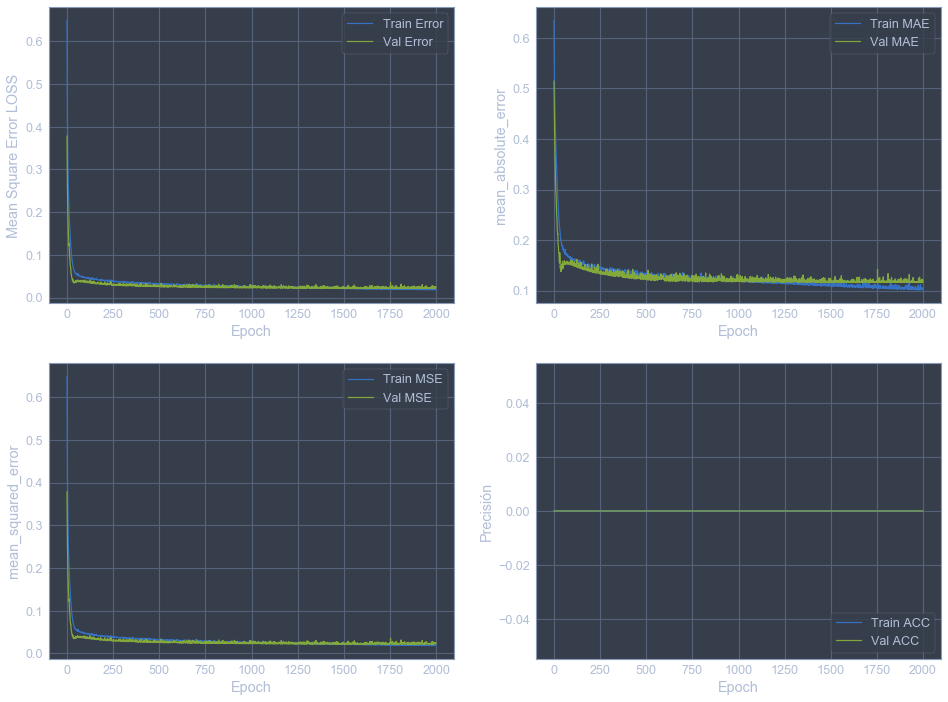

In [15]:
plot_history(history)

Ahora es momento de predecir ya que la red neuronal se encuentra entrenada

In [16]:
y_predic= model.predict(X_test)

Es posible calcular la diferencia entre la prediccion y los datos tomados desde la serie de tiempo

In [17]:
r = y_test - y_predic
ab = abs(r)

Ahora se puede revizar unos datos interesantes

In [18]:
print('Media:', r.mean())
print('Maximo:', ab.max())
print('Minimo:', ab.min())
print('STD:', r.std())

Media: -0.03106265023390501
Maximo: 0.41036798865255486
Minimo: 0.000858373370779264
STD: 0.16876446704326234


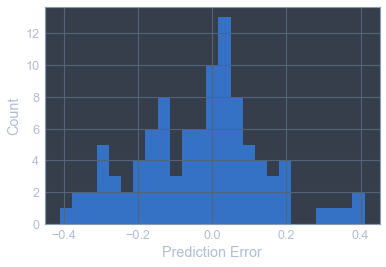

In [19]:
plt.hist(r, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [22]:
Y_inv = y_test*std + mean
Y_pred_inv = y_predic*std + mean

In [25]:
ERR = np.sqrt(mean_squared_error(Y_inv,Y_pred_inv)) 
ERR 

2.6405430325055215

In [26]:
print(Y_inv.max())
ERR*100/Y_inv.max()

120.3092497096122


2.1947963592815536

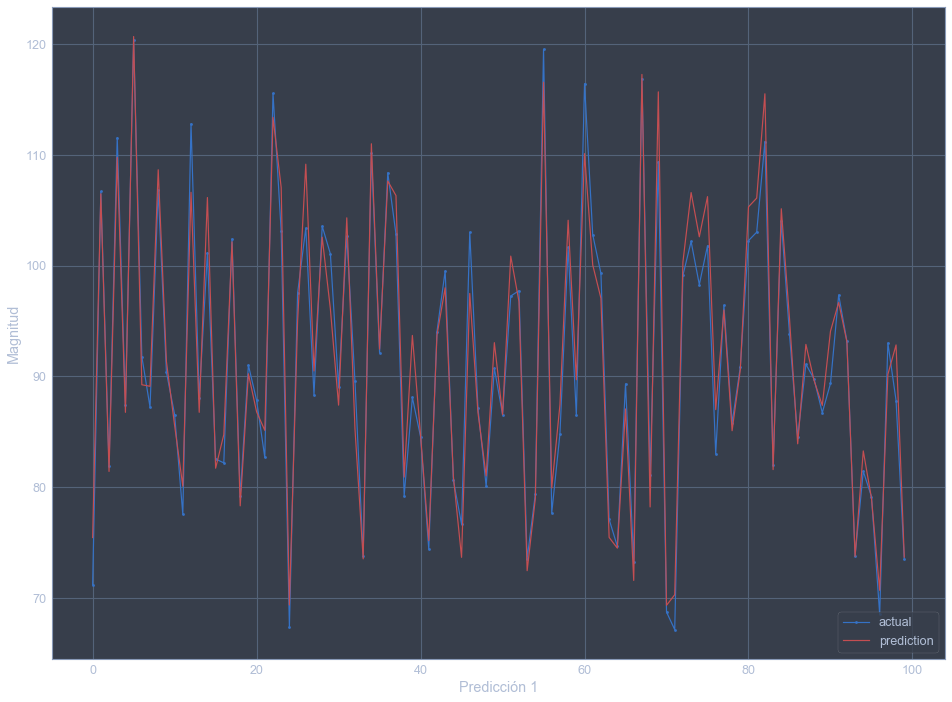

In [21]:
Y_inv = y_test*std + mean
Y_pred_inv = y_predic*std + mean

plt.figure(figsize=(16, 12))
plt.xlabel('Predicción 1')
plt.ylabel('Magnitud')
plt.plot(Y_inv[:, 0],marker='.', label="actual")
plt.plot(Y_pred_inv[:, 0], 'r', label="prediction")
plt.legend(loc="lower right")
plt.show()

<h3>Guardar el modelo entrenado </h3>

In [ ]:
#model.save('modelo_serie_electrica3.h5')